importing the necessary libraries

In [1]:
import numpy
import pandas
import joblib

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score
import matplotlib.pyplot as plt


reading the data and encoding the labels for better performence

In [2]:
with open('mfccdata_fma.npy', 'rb') as f:
    data_set=np.load(f)
print("Dataset shape:", data_set.shape)

Dataset shape: (7994, 20, 130)


In [4]:
with open('labels_fma.npy', 'rb') as f:
    labels=np.load(f)
print("labels shape:", labels.shape)

labels shape: (7994,)


In [5]:
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

In [6]:
print(labels.shape)
print(data_set.shape)

(7994,)
(7994, 20, 130)


In [7]:
#labels
genres=['Electronic','Experimental','Folk','HipHop','Instrumental','International','Pop','Rock']

In [8]:
x=data_set
y=labels

In [9]:
print("recommended number of hidden layers",int(800/(2*(10+36))))

recommended number of hidden layers 8


Classification using LSTM

Import mfcc data :

In [10]:
with open('mfccdata_fma.npy', 'rb') as f:
    data_set=np.load(f)
print("Dataset shape:", data_set.shape)

Dataset shape: (7994, 20, 130)


In [11]:
with open('labels_fma.npy', 'rb') as f:
    labels=np.load(f)
print("labels shape:", labels.shape)

labels shape: (7994,)


label encoding :

In [12]:
from keras.utils import to_categorical

x = data_set

encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

y = labels
y = to_categorical(y,num_classes=8)

defining parameters :

In [13]:
from keras.layers import Input

SEED = 42
CONV_FILTER_COUNT = 256
BATCH_SIZE = 32
EPOCH_COUNT = 100
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
n_features = X_train.shape[2]
input_shape = (None,n_features)
model= Input(input_shape, name='input')



Importing libraries :

In [14]:
def extract_features(signal, sample_rate, frame_size, hop_size):
    mel = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=frame_size, hop_length=hop_size)
    mel=np.array(mel)
    return(mel)

Epoch 1/100
175/175 [==============================] - 12s 36ms/step - loss: 0.7821 - accuracy: 0.1371 - val_loss: 0.4886 - val_accuracy: 0.1972
Epoch 2/100
175/175 [==============================] - 4s 25ms/step - loss: 0.5080 - accuracy: 0.1601 - val_loss: 0.3763 - val_accuracy: 0.1955
Epoch 3/100
175/175 [==============================] - 4s 24ms/step - loss: 0.4186 - accuracy: 0.1807 - val_loss: 0.3654 - val_accuracy: 0.2080
Epoch 4/100
175/175 [==============================] - 4s 26ms/step - loss: 0.3972 - accuracy: 0.1977 - val_loss: 0.3620 - val_accuracy: 0.2238
Epoch 5/100
175/175 [==============================] - 5s 28ms/step - loss: 0.3878 - accuracy: 0.2145 - val_loss: 0.3608 - val_accuracy: 0.2288
Epoch 6/100
175/175 [==============================] - 5s 29ms/step - loss: 0.3798 - accuracy: 0.2209 - val_loss: 0.3596 - val_accuracy: 0.2322
Epoch 7/100
175/175 [==============================] - 5s 28ms/step - loss: 0.3695 - accuracy: 0.2529 - val_loss: 0.3578 - val_accuracy

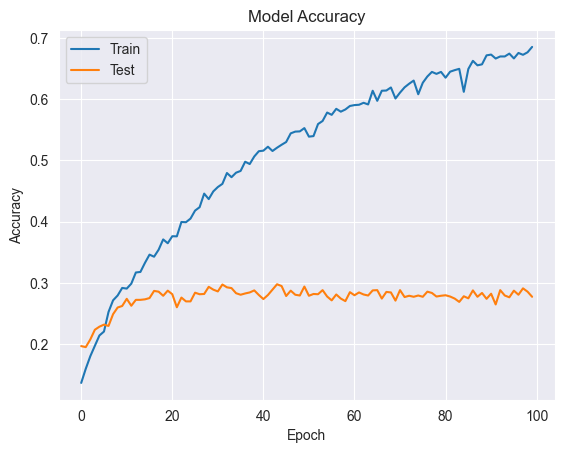

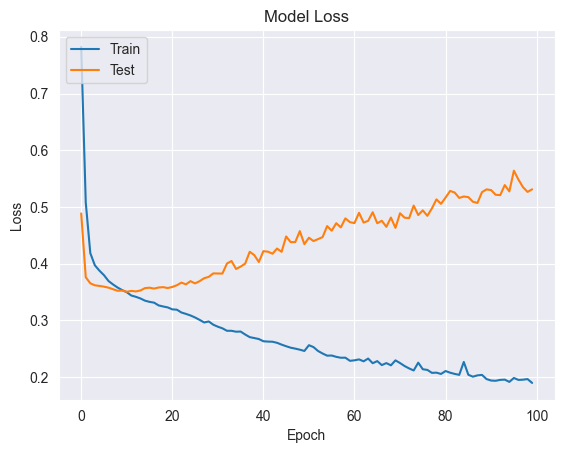

75/75 [==============================] - 2s 10ms/step
F-score: 0.25661452935076334
AUC: 0.6390389072813916
75/75 [==============================] - 1s 11ms/step - loss: 0.5311 - accuracy: 0.2776
test loss : 0.5311224460601807
test_accu : 0.27761566638946533


In [21]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, BatchNormalization
from keras.optimizers import Adam

model = Sequential()
input_shape = (20,130)
model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(LSTM(50, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(8, activation='softmax'))

adam_optimizer = Adam(lr=0.001) 
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#ada = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
#model.compile(optimizer=ada, loss='categorical_crossentropy', metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
history = model.fit(X_train, y_train, epochs=EPOCH_COUNT, batch_size=BATCH_SIZE, verbose=1, validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

y_pred = model.predict(X_test)
y_pred_binary = np.argmax(y_pred, axis=1)
y_test_binary = np.argmax(y_test, axis=1)

f_score = f1_score(y_test_binary, y_pred_binary, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred, average='weighted', multi_class='ovr')

print("F-score:", f_score)
print("AUC:", roc_auc)

test_loss, test_acc = model.evaluate(X_test,y_test)
print("test loss :",test_loss)
print("test_accu :",test_acc)



In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

75/75 [==============================] - 1s 13ms/step
F-score: 0.31435961750953
AUC: 0.6786858319257268
               precision    recall  f1-score   support

   Electronic       0.41      0.27      0.33       291
 Experimental       0.21      0.24      0.22       284
         Folk       0.27      0.31      0.29       290
       HipHop       0.42      0.44      0.43       292
 Instrumental       0.31      0.48      0.38       316
International       0.29      0.24      0.26       314
          Pop       0.24      0.20      0.22       315
         Rock       0.45      0.36      0.40       297

     accuracy                           0.32      2399
    macro avg       0.32      0.32      0.31      2399
 weighted avg       0.32      0.32      0.31      2399


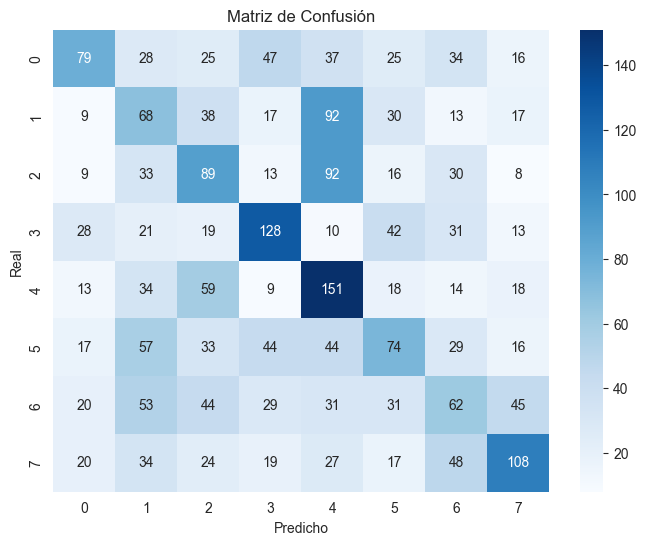

Trained and saved the model to project folder successfully.


In [23]:
model.fit(x, y)
y_pred = model.predict(X_test)
y_pred_binary = np.argmax(y_pred, axis=1)
y_test_binary = np.argmax(y_test, axis=1)
generos = ['Electronic', 'Experimental', 'Folk', 'HipHop', 'Instrumental', 'International', 'Pop', 'Rock']

f_score = f1_score(y_test_binary, y_pred_binary, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred, average='weighted', multi_class='ovr')
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary )

print("F-score:", f_score)
print("AUC:", roc_auc)

class_report = classification_report(y_test_binary, y_pred_binary, target_names=generos)

print(class_report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(8)], yticklabels=[str(i) for i in range(8)])
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()
joblib.dump(model, 'model_fma_lstm0001.pkl')
print("Trained and saved the model to project folder successfully.")

250/250 [==============================] - 6s 24ms/step
               precision    recall  f1-score   support

   Electronic       0.88      0.65      0.75       999
 Experimental       0.55      0.43      0.48       999
         Folk       0.56      0.53      0.54      1000
       HipHop       0.91      0.83      0.87       997
 Instrumental       0.38      0.77      0.51      1001
International       0.77      0.70      0.73       999
          Pop       0.70      0.52      0.59      1000
         Rock       0.75      0.72      0.73       999

     accuracy                           0.64      7994
    macro avg       0.69      0.64      0.65      7994
 weighted avg       0.69      0.64      0.65      7994


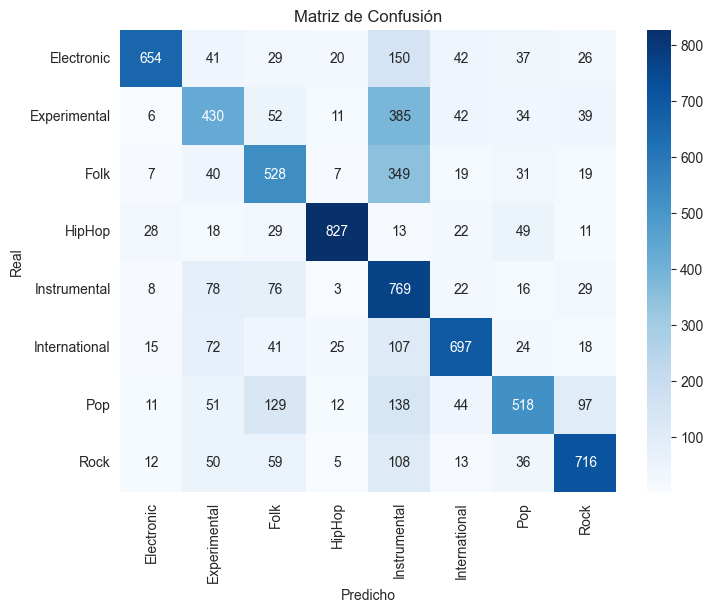

F-score: 0.6518232937737315
Precision: 0.6876136593486418
Recall: 0.6428571428571429
Trained and saved the model to project folder successfully.


In [40]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
model.fit(x, y)
y_pred = model.predict(x)
y_pred_binary = np.argmax(y_pred, axis=1)
y_test_binary = np.argmax(y, axis=1)
generos = ['Electronic', 'Experimental', 'Folk', 'HipHop', 'Instrumental', 'International', 'Pop', 'Rock']
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary )

class_report = classification_report(y_test_binary, y_pred_binary, target_names=generos)

print(class_report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=generos, yticklabels=generos)
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()
 
f_score = f1_score(y_test_binary, y_pred_binary, average='weighted')
precision = precision_score(y_test_binary, y_pred_binary, average='weighted')
#roc_auc = roc_auc_score(y_test_binary2, y_pred_binary2, average='weighted', multi_class='ovr')
recall = recall_score(y_test_binary, y_pred_binary, average='weighted')
print("F-score:", f_score)
#print("AUC:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)
joblib.dump(model, 'model_fma_lstm_final.pkl')
print("Trained and saved the model to project folder successfully.")

In [18]:

import joblib

modelo = joblib.load('model_fma_lstm50.pkl')


In [21]:
import librosa
import sklearn
samp_rate = 22050
frame_size = 2048
hop_size = 512
window=23

def preprocess_audio_file(file_path):
    x, sr = librosa.load(file_path, sr=samp_rate, duration=3.0)
    features = extract_features(x, sr, frame_size, hop_size)
    scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
    features_normalized = scaler.fit_transform(features)
    return features_normalized

archivo_wav = 'r.wav'

input_features = preprocess_audio_file(archivo_wav)

prediction = modelo.predict(np.expand_dims(input_features, axis=0))

clase_predicha_indice = np.argmax(prediction)

generos =['Electronic','Experimental','Folk','HipHop','Instrumental','International','Pop','Rock']
genero_predicho = generos[clase_predicha_indice]

print('El género musical predicho para el archivo WAV es:', genero_predicho)


1/1 [==============================] - 0s 45ms/step
El género musical predicho para el archivo WAV es: Folk


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, BatchNormalization
from keras.optimizers import Adam

model2 = Sequential()
input_shape = (20,130)
model2.add(LSTM(50, return_sequences=True, input_shape=input_shape))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(LSTM(50, return_sequences=False))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(8, activation='softmax'))

adam_optimizer = Adam(lr=0.01)  # Tasa de aprendizaje de 0.001 según tu descripción
model2.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#ada = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
#model.compile(optimizer=ada, loss='categorical_crossentropy', metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
history = model2.fit(X_train, y_train, epochs=EPOCH_COUNT, batch_size=BATCH_SIZE, verbose=1, validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

y_pred = model2.predict(X_test)
y_pred_binary = np.argmax(y_pred, axis=1)
y_test_binary = np.argmax(y_test, axis=1)

f_score = f1_score(y_test_binary, y_pred_binary, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred, average='weighted', multi_class='ovr')

print("F-score:", f_score)
print("AUC:", roc_auc)

test_loss, test_acc = model2.evaluate(X_test,y_test)
print("test loss :",test_loss)
print("test_accu :",test_acc)



NameError: name 'np' is not defined

In [7]:
import numpy as np



loaded_data = np.load('mfccdata_fma.npy')

print(loaded_data)


[[[-1.         -1.         -1.         ... -1.         -1.
   -1.        ]
  [ 1.          1.0000001   0.99999994 ...  0.99999994  1.
    0.9999999 ]
  [ 0.29575348  0.20876256  0.25848812 ...  0.1571371   0.2808133
    0.13694966]
  ...
  [ 0.15968812  0.08951078  0.23181258 ...  0.06517185  0.16412199
   -0.08496206]
  [ 0.20423469  0.10468195  0.25436753 ...  0.04590505  0.16684479
   -0.07796052]
  [ 0.19446397  0.08972418  0.20959911 ...  0.08705038  0.1687044
   -0.08736643]]

 [[-1.         -1.         -0.7625165  ... -1.         -1.
   -1.        ]
  [ 1.0000001   0.99999994  1.         ...  0.9999999   0.9999999
    1.        ]
  [ 0.5411881  -0.41138712 -0.62970066 ...  0.4423346   0.22680588
    0.0783303 ]
  ...
  [ 0.71754074  0.11772933 -0.44510233 ...  0.32283092  0.16234809
    0.07298382]
  [ 0.6932505   0.17187257 -0.3040763  ...  0.3673151   0.20910682
    0.09886964]
  [ 0.6644636  -0.00938099 -0.4438668  ...  0.43424007  0.31632292
    0.19539914]]

 [[-1.         